<a href="https://colab.research.google.com/github/DaniloRamosA/TelecomX_LATAM/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [ ]:

import requests
import pandas as pd
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# Obtener los datos JSON desde la URL
response = requests.get(url)

# Verificamos que la solicitud fue exitosa
if response.status_code == 200:
    # Convertir el contenido JSON a un diccionario de Python
    data = response.json()

    # Convertir los datos a un DataFrame de Pandas
    df = pd.DataFrame(data)

    # Mostrar las primeras filas del DataFrame para verificar
    df.head()
else:
    print(f"Error al cargar los datos. Código de estado: {response.status_code}")




#🔧 Transformación

In [ ]:
# Desestructurar las columnas que contienen diccionarios
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])

# Unir los DataFrames desestructurados con el DataFrame original
df = pd.concat([df[['customerID', 'Churn']], df_customer, df_phone, df_internet, df_account], axis=1)

# Ver las primeras filas del DataFrame final
df.head()





,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#📊 Carga y análisis

Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64


<ipython-input-58-3b45cdc84a8a>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_counts.index, y=churn_counts.values, palette="viridis")


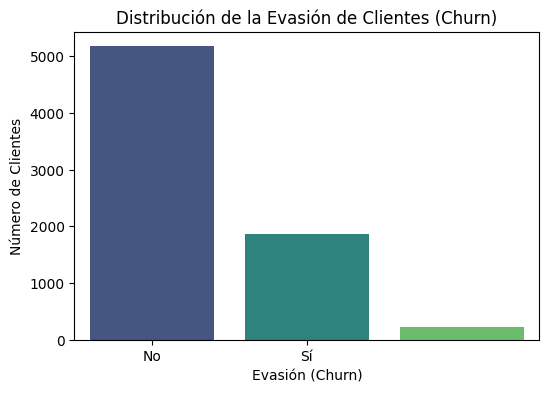

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de que la columna 'Churn' existe y tiene valores binarios
# Comprobar los primeros datos de la columna 'Churn'
print(df['Churn'].value_counts())

# Si los valores no son 0 y 1, podríamos mapearlos a valores binarios:
# df['Churn'] = df['Churn'].map({'Sí': 1, 'No': 0}) # Descomentar si es necesario

# Análisis de la distribución de "Churn"
churn_counts = df['Churn'].value_counts()

# Gráfico de barras de la distribución de "Churn"
plt.figure(figsize=(6, 4))
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette="viridis")
plt.title('Distribución de la Evasión de Clientes (Churn)')
plt.xlabel('Evasión (Churn)')
plt.ylabel('Número de Clientes')
plt.xticks([0, 1], ['No', 'Sí'])  # Si los valores son 0 y 1
plt.show()



#📄Informe final

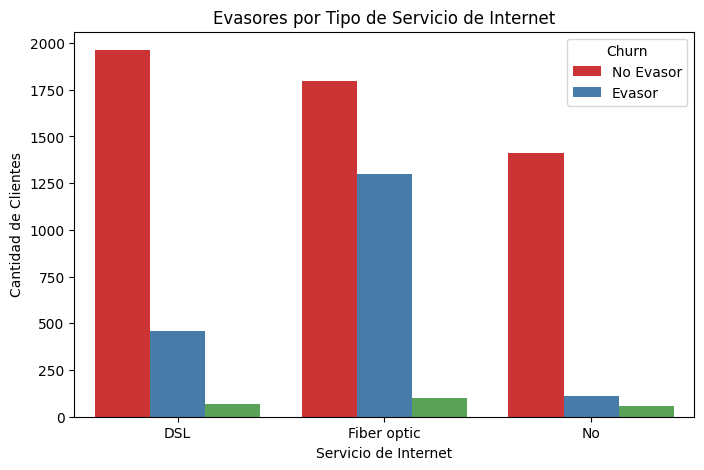

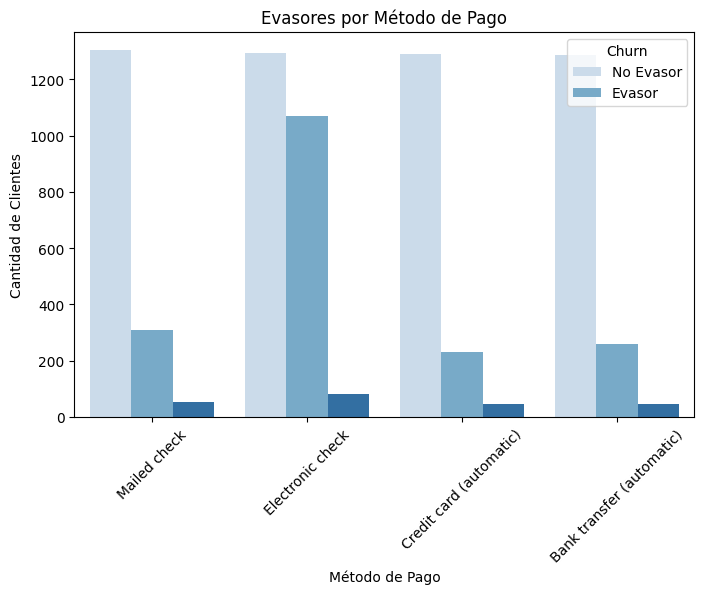

In [ ]:
# Graficar la relación entre el tipo de contrato de Internet y el Churn
plt.figure(figsize=(8, 5))
sns.countplot(x='InternetService', hue='Churn', data=df_final, palette='Set1')
plt.title('Evasores por Tipo de Servicio de Internet')
plt.xlabel('Servicio de Internet')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='Churn', labels=['No Evasor', 'Evasor'])
plt.show()


# Graficar la relación entre el método de pago y el Churn
plt.figure(figsize=(8, 5))
sns.countplot(x='PaymentMethod', hue='Churn', data=df_final, palette='Blues')
plt.title('Evasores por Método de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='Churn', labels=['No Evasor', 'Evasor'])
plt.xticks(rotation=45)
plt.show()


